**Tutorial 4: Implement Simple Linear Regression**


>Use the computers.csv dataset and perform the following activities:

Dataset contains the details of time taken to repair a computer, given the number of units to be repaired.

Dataset: Download from drive link

1.Build Regression model using Scikit-Learn Library(Model 3).

  >a.Set the 'Units' column as the input data or predictor column

  >b.Set the 'Minutes' column as the output data


  >c.Importing the required class -  LinearRegression

  >d.Creating a linear regression model
  
  >e.Fitting the model to the data

  >f.Fetching intercept and coefficient

2.Creating Linear Regression model with calculated coefficient and intercept.

3.Add the above model to the dataframe for Visualization.

4.Visualize Models using pyplot.

5.Compute the Coefficient of Determination to find accuracy.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
computers = pd.read_csv("D:\ML Practical\computers (1).csv")

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12492\2287201271.py:1: SyntaxWarning: invalid escape sequence '\M'
  computers = pd.read_csv("D:\ML Practical\computers (1).csv")


In [16]:
computers

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74
5,5,87
6,6,96
7,6,97
8,7,109
9,8,119


In [17]:
mean_value = computers['Minutes'].mean()
print(mean_value)

97.21428571428571


Text(0, 0.5, 'Minutes')

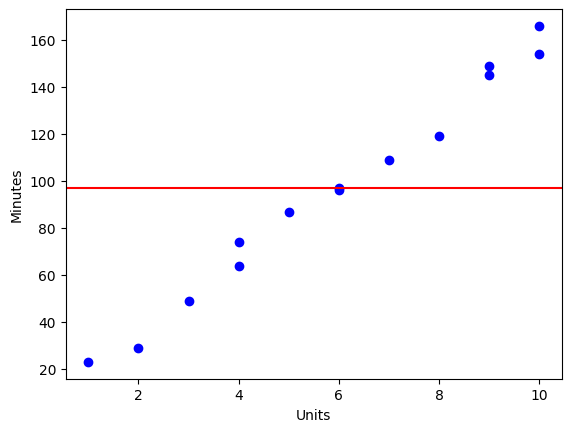

In [18]:
plt.scatter(computers['Units'],computers['Minutes'],color='blue', marker='o')
plt.axhline(y=mean_value,c='r')
plt.xlabel("Units")
plt.ylabel("Minutes")

In [19]:
# Creating three Linear Regression models
minutes_model0 = computers['Minutes'].mean() #Model0 : Estimated time  = Mean ('Minutes')
minutes_model1 = 10 + 12*computers['Units'] #Model1 : Estimated time  =  10 + 12*computers(#Units) minutes
minutes_model2 = 6 + 18*computers['Units']  #Model2 : Estimated time  =  6 + 18*computers(#Units) minutes

In [20]:
computers['min_model0'] = minutes_model0
computers['min_model1'] = minutes_model1
computers['min_model2'] = minutes_model2
computers

,Units,Minutes,min_model0,min_model1,min_model2
0,1,23,97.214286,22,24
1,2,29,97.214286,34,42
2,3,49,97.214286,46,60
3,4,64,97.214286,58,78
4,4,74,97.214286,58,78
5,5,87,97.214286,70,96
6,6,96,97.214286,82,114
7,6,97,97.214286,82,114
8,7,109,97.214286,94,132
9,8,119,97.214286,106,150


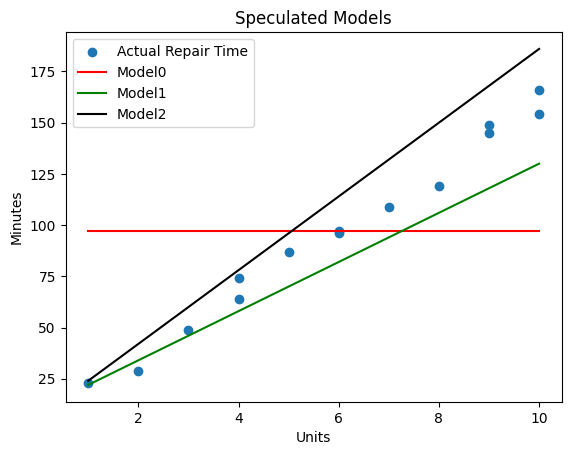

In [21]:
fig,ax = plt.subplots()
ax.scatter(x= 'Units' , y="Minutes" , data = computers , label = 'Actual Repair Time')
ax.plot(computers['Units'], computers['min_model0'], color = 'red' , label = 'Model0')
ax.plot(computers['Units'], computers['min_model1'],  color = 'green' , label = 'Model1')
ax.plot(computers['Units'], computers['min_model2'],  color = 'black' , label = 'Model2')
ax.set_xlabel('Units')
ax.set_ylabel('Minutes')
ax.set_title('Speculated Models')
ax.legend()


In [22]:
x = computers[['Units']]
y = computers['Minutes']
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
print("Intercept" ,model.intercept_)
print("Coefficient", model.coef_)

Intercept 4.161654135338296
Coefficient [15.50877193]


In [23]:
minutes_model3 = 4.161654135338296 + 15.50877193*computers['Units'] #Model3 : Estimated time  =  4.16 + 15.50877193*computers(#Units) minutes
computers['min_model3'] = minutes_model3
computers

,Units,Minutes,min_model0,min_model1,min_model2,min_model3
0,1,23,97.214286,22,24,19.670426
1,2,29,97.214286,34,42,35.179198
2,3,49,97.214286,46,60,50.687970
3,4,64,97.214286,58,78,66.196742
4,4,74,97.214286,58,78,66.196742
5,5,87,97.214286,70,96,81.705514
6,6,96,97.214286,82,114,97.214286
7,6,97,97.214286,82,114,97.214286
8,7,109,97.214286,94,132,112.723058
9,8,119,97.214286,106,150,128.231830


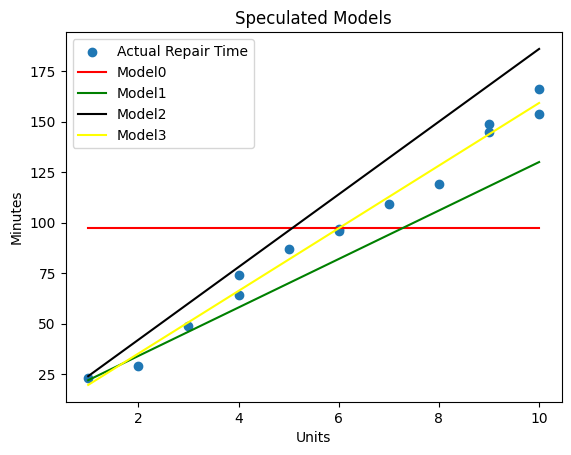

In [24]:
fig,ax = plt.subplots()
ax.scatter(x= 'Units' , y="Minutes" , data = computers , label = 'Actual Repair Time')
ax.plot(computers['Units'], computers['min_model0'], color = 'red' , label = 'Model0')
ax.plot(computers['Units'], computers['min_model1'],  color = 'green' , label = 'Model1')
ax.plot(computers['Units'], computers['min_model2'],  color = 'black' , label = 'Model2')
ax.plot(computers['Units'], computers['min_model3'],  color = 'yellow' , label = 'Model3')
ax.set_xlabel('Units')
ax.set_ylabel('Minutes')
ax.set_title('Speculated Models')
ax.legend()

In [25]:
Rsq = model.score(computers[['Units']],y) * 100
Rsq

98.74371980620737